In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:////Users/Vaidehee/Desktop/10-Advanced-Data-Storage-and-Retrieval/Instructions/Resources/hawaii.sqlite")


In [14]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [15]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.

most_rec_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_rec_date

('2017-08-23')

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

diff = dt.date(2017, 8, 23) - dt.timedelta(days=365)
diff

datetime.date(2016, 8, 23)

In [35]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date.desc()).all()

query


# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(query, columns=['date','precipitation'])
df.set_index('date', inplace=True)


In [43]:
# Sort the dataframe by date

df.index = pd.to_datetime(df.index)
df.sort_index(ascending=True,inplace=True)
df


,precipitation
date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


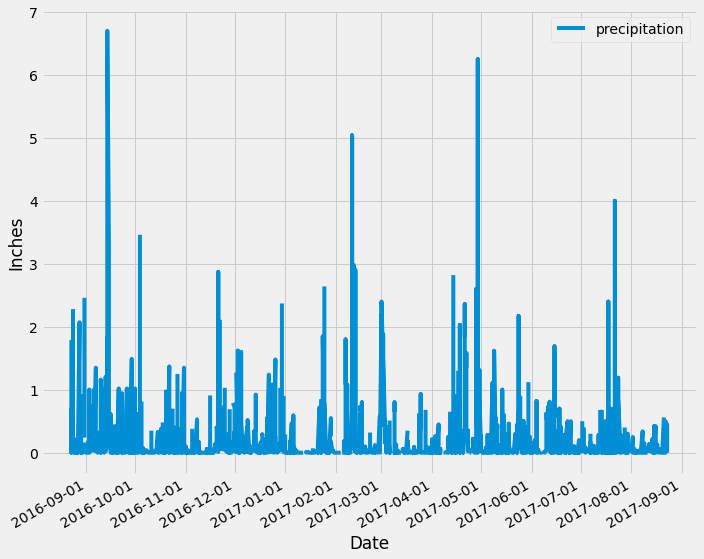

<Figure size 432x288 with 0 Axes>

In [89]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange


ax = df.plot(figsize=(10,8))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('Date')
ax.set_ylabel('Inches')


plt.tight_layout()
plt.show()
plt.savefig("/Users/Vaidehee/Desktop/10-Advanced-Data-Storage-and-Retrieval/Instructions/Images/precipitation_graph.png")


In [90]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [92]:
# Design a query to calculate the total number stations in the dataset
total_station_count = session.query(Station).count()
total_station_count

9

In [97]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [102]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

active_station_temps


[(54.0, 85.0, 71.66378066378067)]

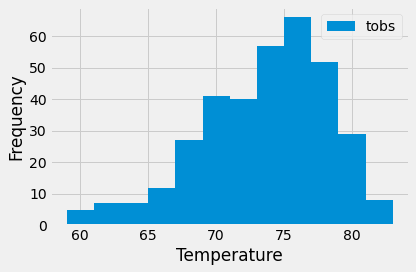

In [113]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year

active_station = session.query(Measurement.tobs).\
    filter(Measurement.date > '2016-08-23', Measurement.station == 'USC00519281').all()
df = pd.DataFrame(active_station, columns=['tobs'])
df.plot.hist(bins=12)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("/Users/Vaidehee/Desktop/10-Advanced-Data-Storage-and-Retrieval/Instructions/Images/precipitation_graph.png")

# Close session

In [ ]:
# Close Session
session.close()